In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [44]:
# 1. Load and Explore
df = pd.read_csv("Student_Performance.csv")

print("Data shape:", df.shape)

Data shape: (10000, 6)


In [45]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [47]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [48]:
# Check for duplicates
print("Duplicates:", df.duplicated().sum())

Duplicates: 127


In [49]:
df = df.drop_duplicates()

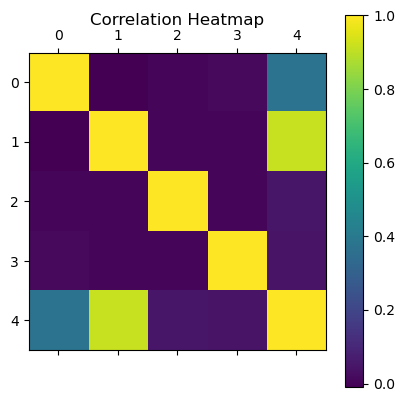

In [50]:
# Correlation heatmap
plt.matshow(df.corr(numeric_only=True))
plt.colorbar()
plt.title("Correlation Heatmap", pad=20)
plt.show()

In [51]:
# 2. Preprocessing
# Target = Performance Index, Features = all others
X = df.drop(columns=["Performance Index"])
y = df["Performance Index"]

In [52]:
# Convert categorical to numbers (very simple: one-hot)
X = pd.get_dummies(X, drop_first=True)

In [53]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [54]:
# 3. Build Model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
# Show coefficients
coef = pd.Series(model.coef_, index=X.columns)
print("\nRegression Coefficients:")
print(coef.sort_values(ascending=False))


Regression Coefficients:
Hours Studied                       2.851022
Previous Scores                     1.018430
Extracurricular Activities_Yes      0.573823
Sleep Hours                         0.472073
Sample Question Papers Practiced    0.188704
dtype: float64


In [56]:
# 4. Evaluate Model
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("MSE :", mse)
print("RMSE:", rmse)
print("R^2 :", r2)


Model Evaluation:
MSE : 4.305900938538475
RMSE: 2.0750664901488034
R^2 : 0.9884301209927054


In [58]:
from sklearn.preprocessing import StandardScaler

# Scale the training and testing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
# Train linear regression again on scaled data
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [60]:
# Get coefficients before and after scaling
coef_raw = pd.Series(model.coef_, index=X.columns)   # from your previous model
coef_scaled = pd.Series(model_scaled.coef_, index=X.columns)

In [61]:
print("\n=== Coefficients without normalization ===")
print(coef_raw.sort_values(ascending=False))


=== Coefficients without normalization ===
Hours Studied                       2.851022
Previous Scores                     1.018430
Extracurricular Activities_Yes      0.573823
Sleep Hours                         0.472073
Sample Question Papers Practiced    0.188704
dtype: float64


In [62]:
print("\n=== Coefficients with normalization ===")
print(coef_scaled.sort_values(ascending=False))


=== Coefficients with normalization ===
Previous Scores                     17.619931
Hours Studied                        7.373316
Sleep Hours                          0.802138
Sample Question Papers Practiced     0.540053
Extracurricular Activities_Yes       0.286906
dtype: float64


In [63]:
# Check performance (should be the same)
y_pred_scaled = model_scaled.predict(X_test_scaled)
print("\nEvaluation with normalization (should match previous):")
print("MSE :", mean_squared_error(y_test, y_pred_scaled))
print("RMSE:", mean_squared_error(y_test, y_pred_scaled) ** 0.5)
print("R^2 :", r2_score(y_test, y_pred_scaled))


Evaluation with normalization (should match previous):
MSE : 4.305900938538473
RMSE: 2.075066490148803
R^2 : 0.9884301209927054


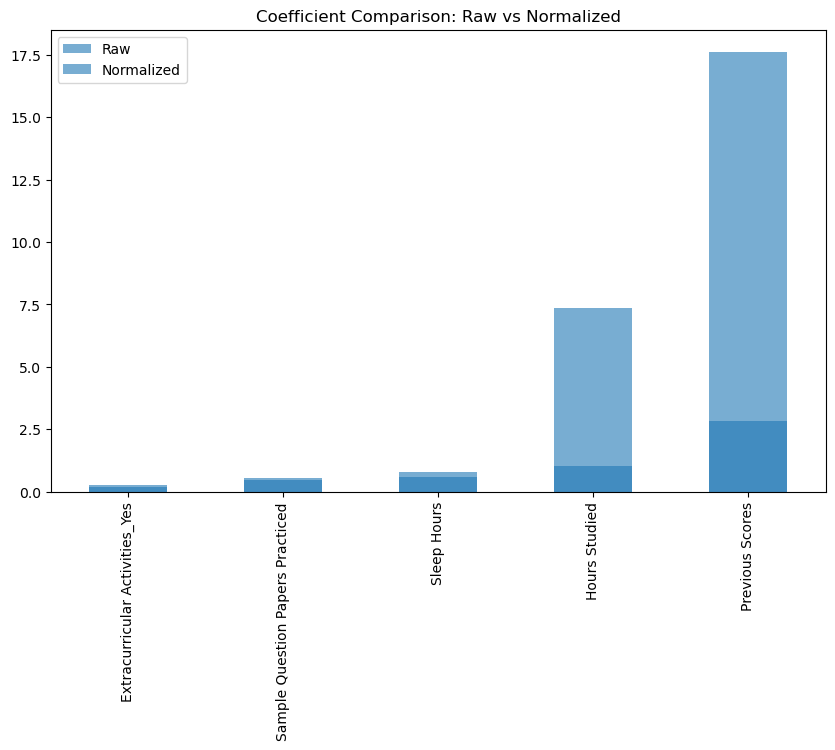

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
coef_raw.sort_values().plot(kind="bar", alpha=0.6, label="Raw")
coef_scaled.sort_values().plot(kind="bar", alpha=0.6, label="Normalized")
plt.title("Coefficient Comparison: Raw vs Normalized")
plt.legend()
plt.show()